In [42]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path="/content/drive/My Drive/Colab Notebooks/Datasets/diabetes.csv"
diabeties=pd.read_csv(file_path)

df=diabeties.copy()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
def check_df(df, head=5):
    print("Shape:")
    print(df.shape)
    print("\nHead:")
    print(df.head(head))
    print("\n Dtypes:")
    print(df.dtypes)
    print("\n Missing Values:")
    print(df.isnull().sum())
    print("\n Describe:")
    print(df.describe(include="all").T)

In [35]:
check_df(df)

Shape:
(768, 9)

Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

 Dtypes:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age               

In [44]:
zero_values = (df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
print("\nMissing values per column:\n", zero_values)



Missing values per column:
 Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [45]:
df['Glucose'].replace(0, df['Glucose'].median(), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True)
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True)
df['BMI'].replace(0, df['BMI'].median(), inplace=True)


zero_values_after = (df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
print("\nZero values after imputation:\n", zero_values_after)


Zero values after imputation:
 Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


<ipython-input-45-0331d77c1809>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].replace(0, df['Glucose'].median(), inplace=True)
<ipython-input-45-0331d77c1809>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Missing values have been replaced using the median of each column. Now, no columns contain zero values, ensuring data consistency.

In [46]:
df['AgeCategory'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 100], labels=['Young', 'Middle-Age', 'Senior', 'Old'])

df['HealthRiskScore'] = df['BMI'] * df['Glucose'] / 100

print("\nNew Features Added. First 5 Rows:\n", df.head())


New Features Added. First 5 Rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeCategory  HealthRiskScore  
0                     0.627   50        1      Senior           49.728  
1                     0.351   31        0  Middle-Age           22.610  
2                     0.672   32        1  Middle-Age           42.639  
3                     0.167   21        0       Young           25.009  
4                     2.288   33        1  Middle-Age           59.047  


AgeCategory: Groups individuals into "Young", "Middle-Age", "Senior", and "Old".
HealthRiskScore: A new metric that combines BMI and Glucose to represent potential health risks.
These features may improve model performance.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'HealthRiskScore']] = scaler.fit_transform(
    df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'HealthRiskScore']]
)

print("\nFeatures scaled. First 5 Rows:\n", df_scaled.head())


Features scaled. First 5 Rows:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.866045      -0.031990       0.831114 -0.608201  0.167240   
1            1 -1.205066      -0.528319       0.180566 -0.608201 -0.851551   
2            8  2.016662      -0.693761      -0.469981 -0.608201 -1.331838   
3            1 -1.073567      -0.528319      -0.469981 -0.006185 -0.633239   
4            0  0.504422      -2.679076       0.831114  0.695378  1.549885   

   DiabetesPedigreeFunction  Age  Outcome AgeCategory  HealthRiskScore  
0                     0.627   50        1      Senior         0.664853  
1                     0.351   31        0  Middle-Age        -1.181332  
2                     0.672   32        1  Middle-Age         0.182236  
3                     0.167   21        0       Young        -1.018009  
4                     2.288   33        1  Middle-Age         1.299288  


All numerical features have been scaled using standardization (StandardScaler). This ensures that features are on a similar scale, preventing bias in the machine learning model.

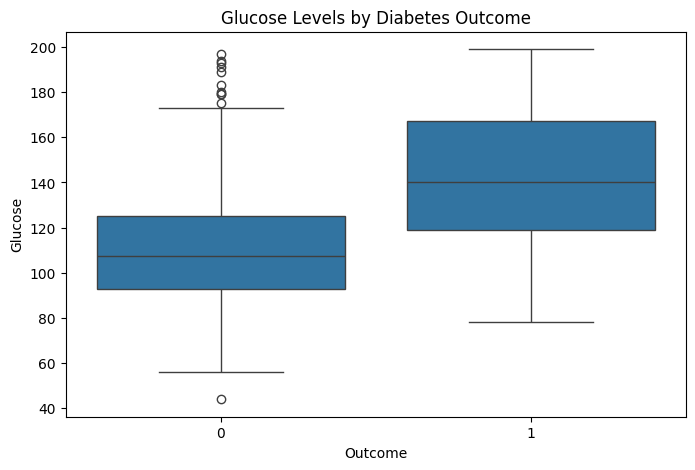

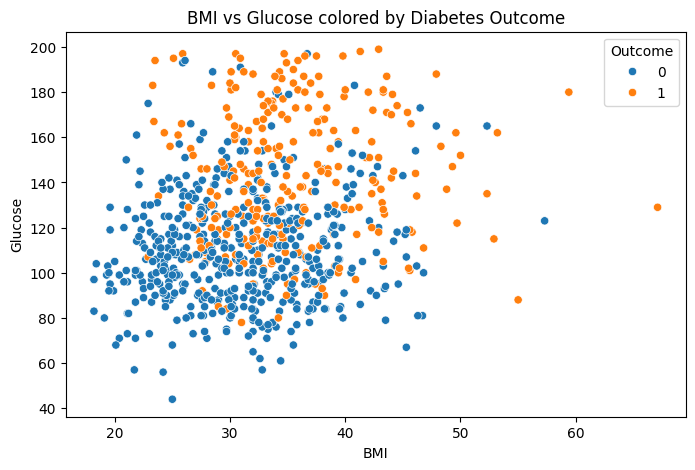

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Outcome'], y=df['Glucose'])
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['BMI'], y=df['Glucose'], hue=df['Outcome'])
plt.title("BMI vs Glucose colored by Diabetes Outcome")
plt.show()

The boxplot shows the distribution of glucose levels for diabetic and non-diabetic individuals.
The scatter plot shows how BMI and Glucose levels interact, with different colors indicating diabetes outcomes.

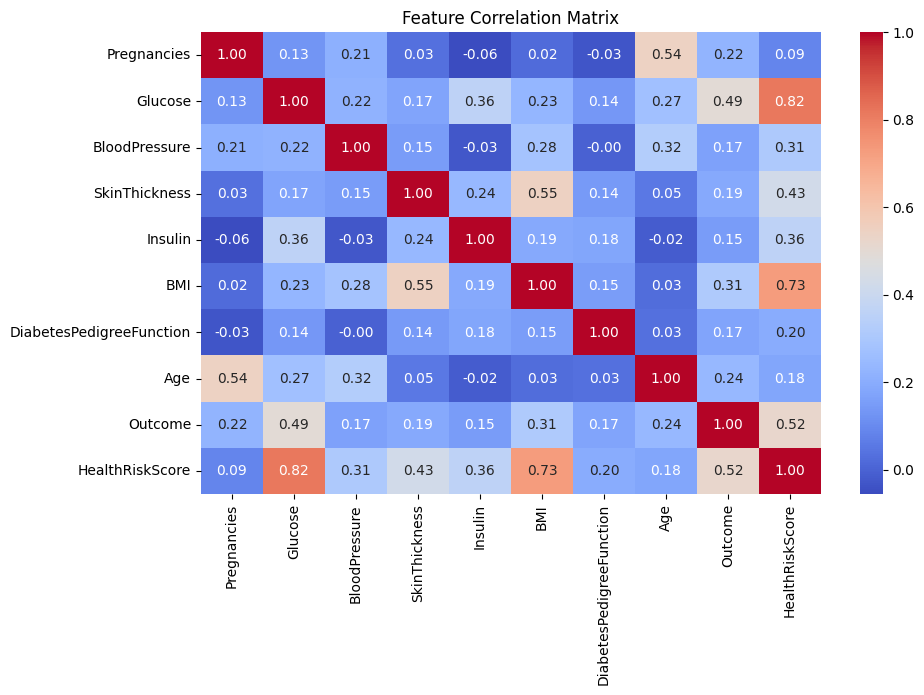

In [50]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

The correlation matrix helps us identify which features are strongly correlated. We should remove highly correlated independent features to reduce redundancy.

In [31]:
X = df_scaled.drop(['Outcome', 'AgeCategory'], axis=1)
Y = df_scaled['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0, stratify=Y)

The dataset has been split into training (80%) and testing (20%) sets. The target variable is 'Outcome', which indicates whether a person has diabetes (1) or not (0).


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train)

y_predict = model.predict(X_test)

accuracy = accuracy_score(Y_test, y_predict)
print("\nLogistic Regression Model Accuracy:", round(accuracy, 2) * 100, '%')


Logistic Regression Model Accuracy: 77.0 %


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


A logistic regression model was trained to predict diabetes. The model's accuracy score on the test set indicates how well it performs.